In [83]:
#This code block will show all the images in the dataset. Be prepared to interrupt the process

import tarfile
from PIL import Image
import io

# Path to the tar file
tar_file_path = 'C:/Users/kacie/Documents/DS 5500 Data Science Capstone/images.tar'

# Open the tar file
with tarfile.open(tar_file_path, 'r') as tar:  # Use 'r' for regular .tar files
    # List all the contents of the tar file
    tar_contents = tar.getnames()
    
    print("Contents of the tar file:")
    for file_name in tar_contents:
        print(file_name)  # Display file names in the archive
    
    # Loop through the tar contents and display image files
    for file_name in tar_contents:
        if file_name.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):  # Check for image files
            # Extract the image file as a file-like object in memory
            image_file = tar.extractfile(file_name)
            
            if image_file is not None:
                # Read the image data into memory and open it using PIL
                image_data = image_file.read()
                image = Image.open(io.BytesIO(image_data))
                
                # Display the image
                image.show(title=file_name)
            else:
                print(f"Could not extract {file_name}")


Contents of the tar file:
Images
Images/n02085620-Chihuahua
Images/n02085620-Chihuahua/n02085620_10621.jpg
Images/n02085620-Chihuahua/n02085620_10976.jpg
Images/n02085620-Chihuahua/n02085620_11238.jpg
Images/n02085620-Chihuahua/n02085620_11258.jpg
Images/n02085620-Chihuahua/n02085620_11337.jpg
Images/n02085620-Chihuahua/n02085620_1152.jpg
Images/n02085620-Chihuahua/n02085620_11696.jpg
Images/n02085620-Chihuahua/n02085620_11818.jpg
Images/n02085620-Chihuahua/n02085620_11948.jpg
Images/n02085620-Chihuahua/n02085620_1205.jpg
Images/n02085620-Chihuahua/n02085620_12334.jpg
Images/n02085620-Chihuahua/n02085620_1235.jpg
Images/n02085620-Chihuahua/n02085620_1298.jpg
Images/n02085620-Chihuahua/n02085620_13151.jpg
Images/n02085620-Chihuahua/n02085620_1321.jpg
Images/n02085620-Chihuahua/n02085620_13383.jpg
Images/n02085620-Chihuahua/n02085620_1346.jpg
Images/n02085620-Chihuahua/n02085620_14413.jpg
Images/n02085620-Chihuahua/n02085620_14516.jpg
Images/n02085620-Chihuahua/n02085620_1455.jpg
Images/

KeyboardInterrupt: 

In [74]:
import tarfile

# Path to the tar file (can be .tar or .tar.gz)
tar_file_path = 'C:/Users/kacie/Documents/DS 5500 Data Science Capstone/annotation.tar'

file_names = []

# Open the tar file in read mode ('r:gz' for .tar.gz, 'r' for .tar)
with tarfile.open(tar_file_path, 'r') as tar:
    # List all the contents of the tar file
    tar_contents = tar.getnames()

    # Print the list of files
    print("Contents of the tar file:")
    for file_name in tar_contents:
        print(file_name)

Contents of the tar file:
Annotation
Annotation/n02085620-Chihuahua
Annotation/n02085620-Chihuahua/n02085620_10074
Annotation/n02085620-Chihuahua/n02085620_10131
Annotation/n02085620-Chihuahua/n02085620_10621
Annotation/n02085620-Chihuahua/n02085620_1073
Annotation/n02085620-Chihuahua/n02085620_10976
Annotation/n02085620-Chihuahua/n02085620_11140
Annotation/n02085620-Chihuahua/n02085620_11238
Annotation/n02085620-Chihuahua/n02085620_11258
Annotation/n02085620-Chihuahua/n02085620_11337
Annotation/n02085620-Chihuahua/n02085620_11477
Annotation/n02085620-Chihuahua/n02085620_1152
Annotation/n02085620-Chihuahua/n02085620_11696
Annotation/n02085620-Chihuahua/n02085620_11818
Annotation/n02085620-Chihuahua/n02085620_11948
Annotation/n02085620-Chihuahua/n02085620_1205
Annotation/n02085620-Chihuahua/n02085620_12101
Annotation/n02085620-Chihuahua/n02085620_12334
Annotation/n02085620-Chihuahua/n02085620_1235
Annotation/n02085620-Chihuahua/n02085620_1271
Annotation/n02085620-Chihuahua/n02085620_127

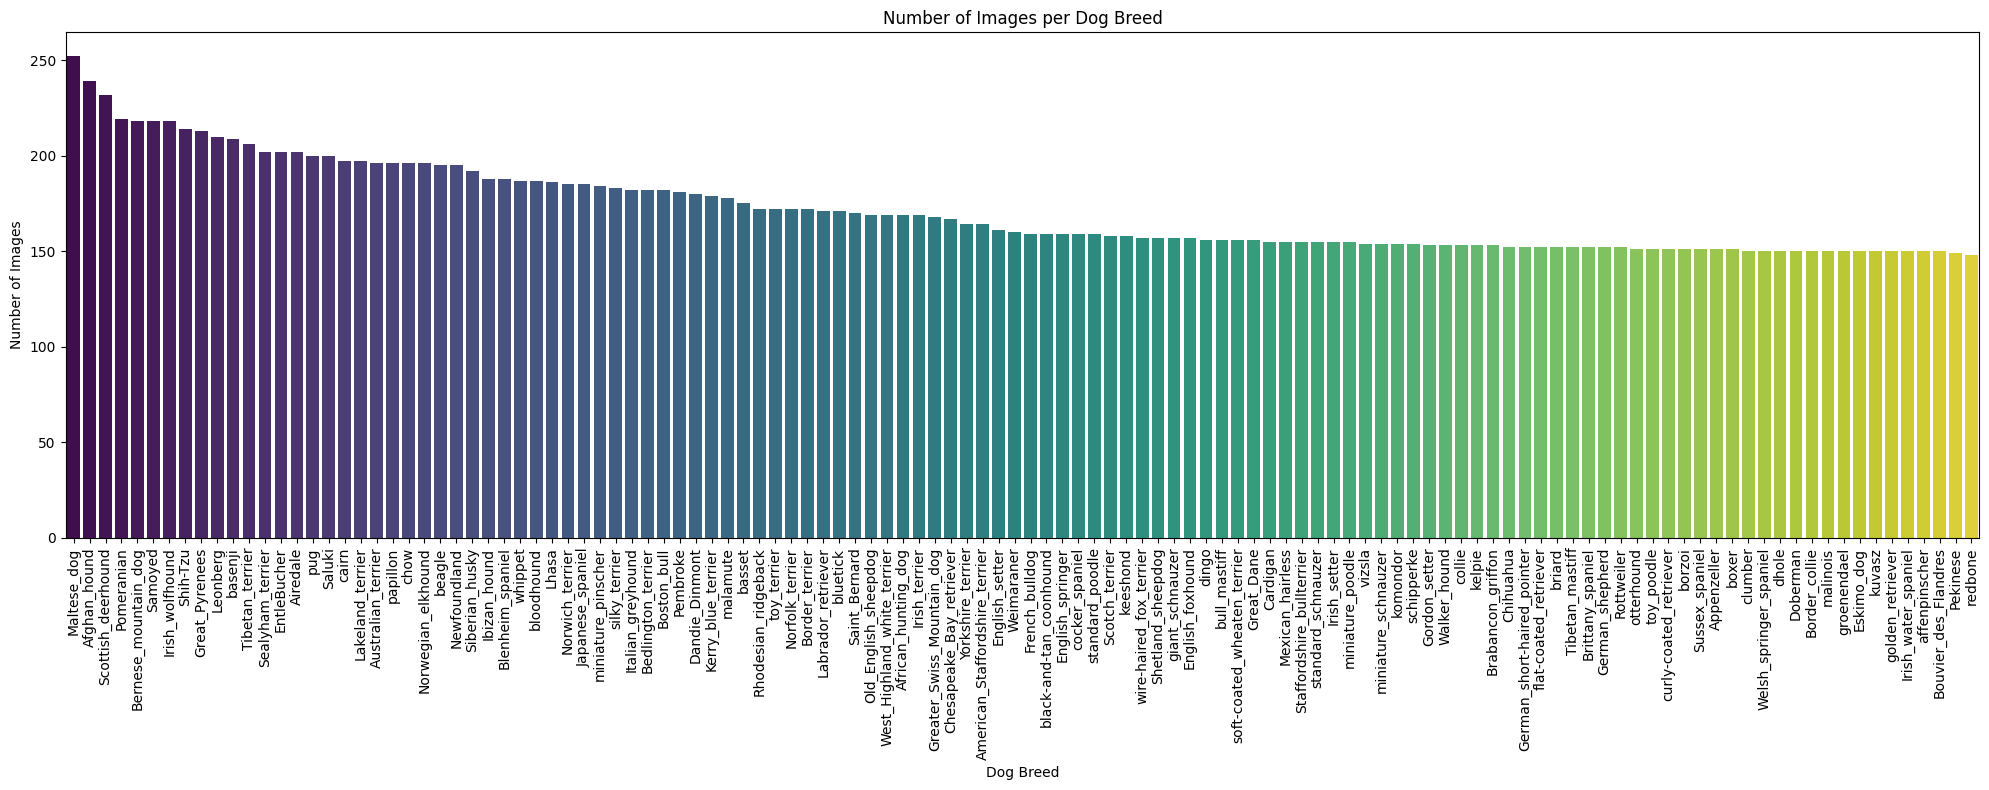

In [72]:
import tarfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Path to the tar file
tar_file_path = 'C:/Users/kacie/Documents/DS 5500 Data Science Capstone/annotation.tar'

# List to store the extracted breed names
breed_names_temp = []

with tarfile.open(tar_file_path, 'r') as tar:  # Use 'r' for regular .tar files
    # List all the contents of the tar file
    tar_contents = tar.getnames()
    
    # Loop through the tar contents to extract breed names
    for file_name in tar_contents:
        # Only process files that match the pattern with breed names
        first_dash_index = file_name.find('-')

        if first_dash_index != -1:
    # Extract the substring from the index of the first dash to the end
            substring = file_name[first_dash_index+1:]
            breed_names_temp.append(substring)

breed_names = []
for breed in breed_names_temp:
    if '/' in breed:
        breed_name = breed.split('/', 1)[0] 
        breed_names.append(breed_name)

# Create a DataFrame from the extracted breed names
breed_df = pd.DataFrame(breed_names, columns=['Breed'])

# Step 2: Count the occurrences of each breed
breed_counts = breed_df['Breed'].value_counts()

# Step 3: Plot a bar graph of breed counts
plt.figure(figsize=(20, 8))
sns.barplot(x=breed_counts.index, y=breed_counts.values, palette='viridis')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.xlabel('Dog Breed')
plt.ylabel('Number of Images')
plt.title('Number of Images per Dog Breed')
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Show the plot
plt.show()


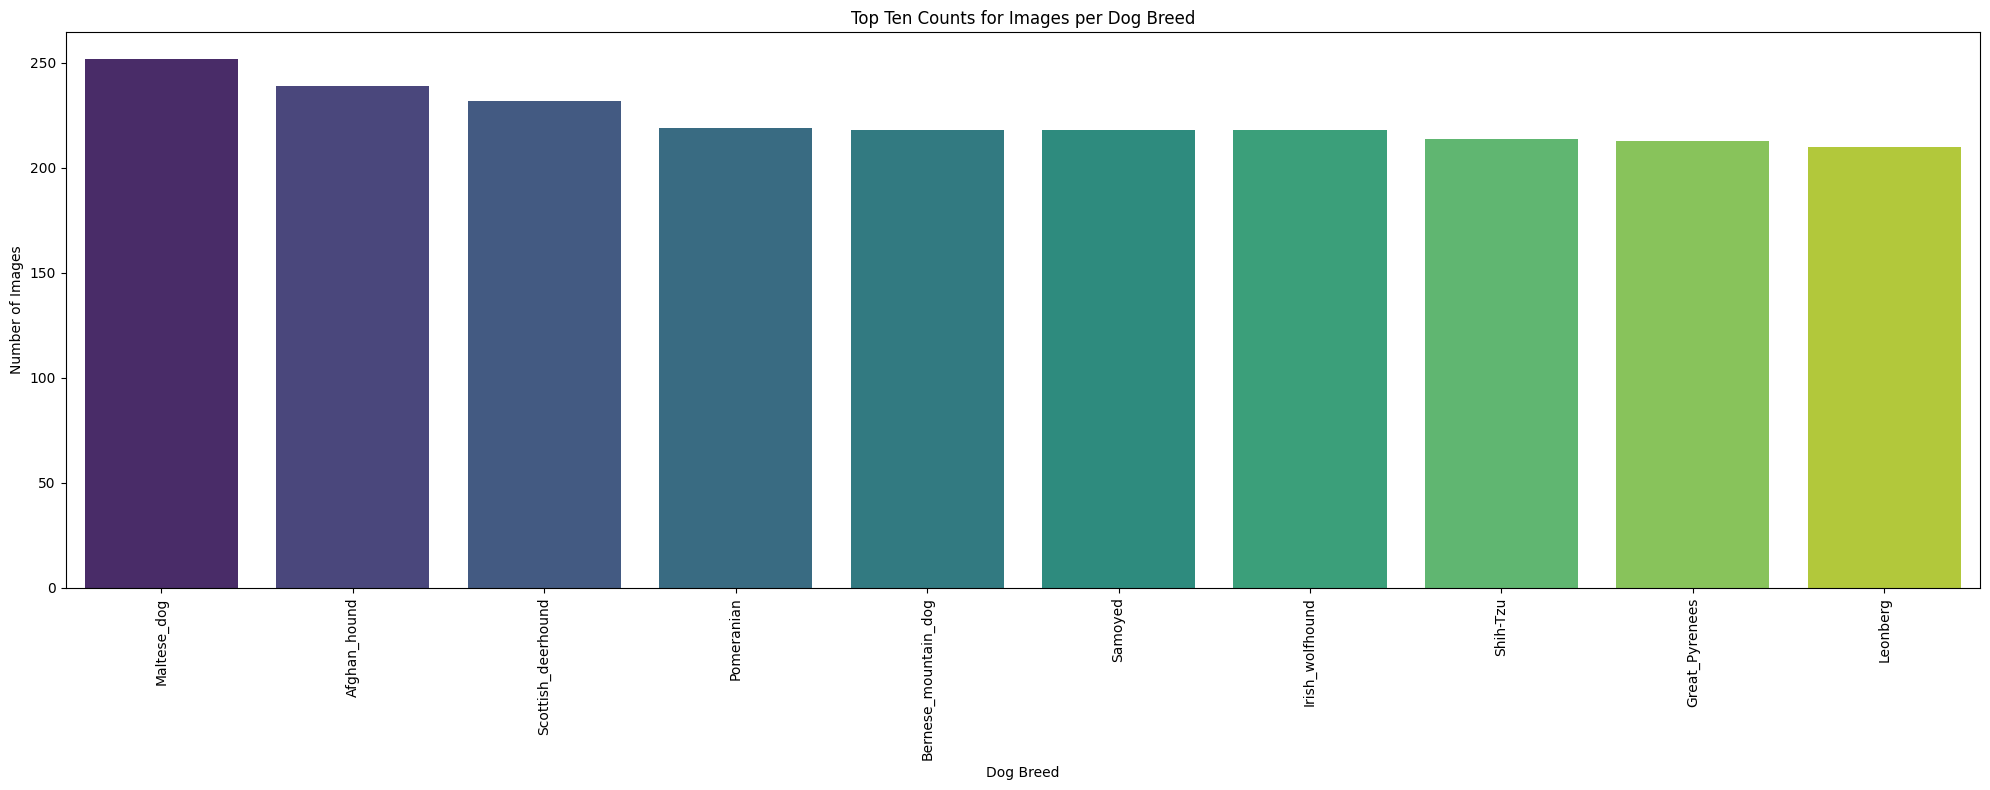

In [77]:
plt.figure(figsize=(20, 8))
sns.barplot(x=breed_counts[:10].index, y=breed_counts[:10].values, palette='viridis')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.xlabel('Dog Breed')
plt.ylabel('Number of Images')
plt.title('Top Ten Counts for Images per Dog Breed')
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Show the plot
plt.show()

In [73]:
breed_counts

Maltese_dog             252
Afghan_hound            239
Scottish_deerhound      232
Pomeranian              219
Bernese_mountain_dog    218
                       ... 
Irish_water_spaniel     150
affenpinscher           150
Bouvier_des_Flandres    150
Pekinese                149
redbone                 148
Name: Breed, Length: 120, dtype: int64